##  Author : Riasad Alvi
### Date : 20 Jan 2025

In [7]:
!pip install tensorflow

from keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
img = image.load_img('/content/catBoxing.jpg',target_size=(224,224))

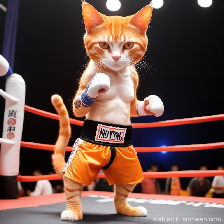

In [15]:
img

In [16]:
# Creating an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,         # Randomly rotates images by up to 40 degrees.
    width_shift_range=0.2,     # Randomly shifts the image horizontally by 20% of its width.
    height_shift_range=0.2,    # Randomly shifts the image vertically by 20% of its height.
    rescale=1./255,            # Rescales pixel values to the range [0, 1] for normalization.
    shear_range=0.2,           # Applies a shearing transformation with an intensity of 0.2.
    zoom_range=0.2,            # Randomly zooms in or out by 20%.
    horizontal_flip=True,      # Randomly flips images horizontally.
    fill_mode='nearest'        # Fills in missing pixels after transformations using the nearest pixel values.
)



### **Purpose and Significance:**
- **Purpose**: This code initializes a data augmentation pipeline using `ImageDataGenerator`. It applies various transformations to training images to artificially expand the dataset.
- **Significance**:
  - **Data Augmentation**: Increases the size and diversity of the training dataset, helping the model generalize better.
  - **Normalization**: Rescaling pixel values to [0, 1] ensures consistent input range for the model, improving training stability.
  - **Avoid Overfitting**: Random transformations make the model robust to variations, reducing overfitting on the training set.

In [18]:
# its not numpy array , so we need to convert it
type(img)

PIL.Image.Image

In [19]:
# Converting the image into a NumPy array
img = image.img_to_array(img)
# img_to_array: Converts the input image (usually a PIL Image) into a NumPy array.
# The resulting array will have the shape (height, width, channels).
# This is necessary because machine learning models expect numerical arrays as inputs.


In [20]:
type(img)

numpy.ndarray

In [21]:
img.shape

(224, 224, 3)

In [22]:
# Reshaping the image array to match the input format expected by the model
input_batch = img.reshape(1, 224, 224, 3)
# reshape: Changes the shape of the image array to (1, 224, 224, 3), where:
# 1: The batch size (a single image is treated as a batch of size 1).
# 224: The image height.
# 224: The image width.
# 3: The number of color channels (RGB).


In [27]:
i = 0
# Initializing a counter variable `i` to track the number of augmented images generated.

for output in datagen.flow(input_batch, batch_size=1, save_to_dir='aug', save_prefix='cat', save_format='jpeg'):
    # Using the `flow` method of `datagen` to generate augmented images.
    # input_batch: The input image batch (reshaped previously to match model requirements).
    # batch_size=1: Generates one augmented image per iteration.
    # save_to_dir='aug': Saves the generated augmented images to the folder named 'aug'.
    # save_prefix='cat': Adds the prefix 'cat' to the filenames of the saved images.
    # save_format='jpeg': Saves the images in JPEG format.

    i += 1
    # Incrementing the counter for each generated image.

    if i > 10:
        break
        # Stops the loop after generating and saving 10 augmented images.



### **Purpose and Significance:**
- **Purpose**: This code generates 10 augmented versions of the input image (`input_batch`) using the `datagen` instance and saves them to the `aug` directory.
- **Significance**:
  - **Data Augmentation**: Generates diverse variations of a single image, improving the model’s ability to generalize by learning from slightly modified data.
  - **File Saving**: Saves the augmented images with a consistent prefix (`cat`) and format (`jpeg`) for later use in training or analysis.
  - **Control**: The loop ensures that exactly 10 augmented images are generated and saved, providing control over the number of outputs.